# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# data aquisition of our dataset(Mobile price prediction)
Mobile=pd.read_csv("C:\\Users\\hp\\digicrome data science\\project  4 (mobile prediction)\\Processed_Flipdata - Processed_Flipdata.csv")

In [3]:
# printing out complete dataset of Realstate
Mobile

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [4]:
#reading out first 5 and last five rows of dataset
# with the help of .tail and .head we can read the first 5 and last rows of our dataset
Mobile.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [5]:
Mobile.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


In [6]:
# checking out shape of complete dataset
# with this code we can identify how much row and columns are avaiable in our dataset
Mobile.shape

(541, 12)

In [7]:
# checking out how many columns we are having in our dataset
Mobile.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [8]:
#checking out how many object,intergar and boolean value we are having in our dataset
Mobile.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [9]:
# converting a column containing prize stored as strings (object dtype) into integers:
# Step 1: Remove any non-numeric characters and commas
Mobile['Prize'] = Mobile['Prize'].str.replace(r'\D', '').str.replace(',', '')

# Step 2: Convert the string to integers using astype
Mobile['Prize'] = Mobile['Prize'].astype(int)

# Display the first few rows to verify the conversion
print(Mobile.head())

   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999  


In [10]:
#checking out how many missing values in number in each column we have having our dataset
#sum of missing value in each columns
Mobile.isnull().sum().to_dict()

{'Unnamed: 0': 0,
 'Model': 0,
 'Colour': 0,
 'Memory': 0,
 'RAM': 0,
 'Battery_': 0,
 'Rear Camera': 0,
 'Front Camera': 0,
 'AI Lens': 0,
 'Mobile Height': 0,
 'Processor_': 0,
 'Prize': 0}

In [11]:
#checking out how many in total number we have missing including all number of columns
Mobile.isnull().sum().sum()

0

In [12]:
#checking out how many missing values we have having our dataset
#True = missing value, False = not null
Mobile.isnull()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
## Find duplicate rows based on all columns
duplicate_rows_mobile = Mobile[Mobile.duplicated()]
print("duplicate_rows_mobile:")
print(duplicate_rows_mobile)

duplicate_rows_mobile:
Empty DataFrame
Columns: [Unnamed: 0, Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Mobile Height, Processor_, Prize]
Index: []


by above method of coding we can easily understand that we do not have any duplicate column in our dataset

In [14]:
#dropping "Unnamed: 0" columns as it seems like this column is only having series of numeric number and not useful as per observation
del_unwanted_col_Mobile= Mobile.drop(["Unnamed: 0"], axis = 1)
del_unwanted_col_Mobile

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [15]:
#checking the summary of dataset
del_unwanted_col_Mobile.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


here .describe() provides summary statistics of the numerical columns in the DataFrame. It computes statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

# Converting categorical features into numerical

# Ordinal encoding

Taken out all the variable columns name and counts according to their functionality and visualisation that these need to be convert by "ORDINAL ENCODING"

In [16]:
#printing unique value
del_unwanted_col_Mobile['Rear Camera'].unique()

array(['13MP', '50MP', '8MP', '40MP', '32MP', '48MP', '64MP', '108MP',
       '0MP', '2MP', '12MP', '200MP', '5MP', '16MP'], dtype=object)

In [17]:
# Initialize ce.ordinalEncoder
#here we didn’t defines or map the value of object of class therefore it will map the default value that’s is 0,1,2,3….
encoder = ce.OrdinalEncoder()

# Fit and transform the data
del_unwanted_col_Mobile['Rear Camera'] = encoder.fit_transform(del_unwanted_col_Mobile['Rear Camera'])

# Print the result
del_unwanted_col_Mobile

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,1,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,1,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,2,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,3,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,2,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,2,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,13,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,2,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,2,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [18]:
del_unwanted_col_Mobile['Front Camera'].unique()

array(['5MP', '16MP', '8MP', '13MP', '0MP', '32MP', '10MP', '50MP',
       '60MP', '20MP', '44MP', '2MP', '12MP'], dtype=object)

In [19]:
# Fit and transform the data
del_unwanted_col_Mobile['Front Camera'] = encoder.fit_transform(del_unwanted_col_Mobile['Front Camera'])

# Print the result
del_unwanted_col_Mobile

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,1,1,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,1,1,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,2,2,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,3,1,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,2,1,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,2,13,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,13,12,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,2,3,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,2,6,0,16.26,"Exynos 1380, Octa Core",38999


# label encoding

In [20]:
del_unwanted_col_Mobile['Processor_'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [21]:
processor_label_encoder = LabelEncoder()
del_unwanted_col_Mobile['processor_encoded'] = processor_label_encoder.fit_transform(del_unwanted_col_Mobile['Processor_'])
del_unwanted_col_Mobile

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,processor_encoded
0,Infinix SMART 7,Night Black,64,4,6000,1,1,1,16.76,Unisoc Spreadtrum SC9863A1,7299,113
1,Infinix SMART 7,Azure Blue,64,4,6000,1,1,1,16.76,Unisoc Spreadtrum SC9863A1,7299,113
2,MOTOROLA G32,Mineral Gray,128,8,5000,2,2,0,16.64,Qualcomm Snapdragon 680,11999,75
3,POCO C50,Royal Blue,32,2,5000,3,1,0,16.56,Mediatek Helio A22,5649,56
4,Infinix HOT 30i,Marigold,128,8,5000,2,1,1,16.76,G37,8999,14
...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,2,13,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999,89
537,LAVA Z21,Cyan,32,2,3100,13,12,0,12.70,Octa Core,5998,68
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,2,3,0,16.76,MediaTek Helio G35,9990,35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,2,6,0,16.26,"Exynos 1380, Octa Core",38999,11


In [22]:
# we can also store the mapping of encoded values to original categories
processor_mapping = dict(zip(processor_label_encoder.classes_, processor_label_encoder.transform(processor_label_encoder.classes_)))

# Printing the mapping (optional)
print(processor_mapping)

{'0 0 0 208MHz': 0, '2GHz, Quad Core ': 1, '6 Core': 2, 'Android': 3, 'Dimensity 1080, Octa Core ': 4, 'Dimensity 6020': 5, 'Dimensity 8020': 6, 'Dimensity 810': 7, 'Dimensity 8100': 8, 'Dimensity 8200': 9, 'Exynos 1330, Octa Core ': 10, 'Exynos 1380, Octa Core ': 11, 'Exynos 850': 12, 'Exynos Octa Core': 13, 'G37': 14, 'Google Tensor': 15, 'Google Tensor G2': 16, 'Helio A22': 17, 'Helio G25': 18, 'Helio G36': 19, 'Helio G85': 20, 'Helio G88': 21, 'Helio G99': 22, 'IOS': 23, 'MT6260A': 24, 'MTK Dimensity 700': 25, 'MTK6261D': 26, 'MediaTek': 27, 'MediaTek Dimensity 700': 28, 'MediaTek Dimensity 800U': 29, 'MediaTek G35': 30, 'MediaTek G37': 31, 'MediaTek Helio A20': 32, 'MediaTek Helio A22': 33, 'MediaTek Helio G25': 34, 'MediaTek Helio G35': 35, 'MediaTek Helio G37': 36, 'MediaTek Helio G70': 37, 'MediaTek Helio G80': 38, 'MediaTek Helio G85': 39, 'MediaTek Helio G88': 40, 'MediaTek Helio G95': 41, 'MediaTek Helio G96': 42, 'MediaTek Helio P35': 43, 'Mediatek Dimensity 1080': 44, 'Med

This code will create a new column named 'processor_encoded' in our DataFrame, containing the numeric values obtained by label encoding the 'processor_' column. Additionally, the processor_mapping variable will hold a dictionary mapping the original categorical values to their corresponding encoded numeric values.

In [23]:
# considering removing the original 'processor_' column to avoid redundancy, Drop the original 'processor_' column 
del_unwanted_col_Mobile.drop('Processor_', axis=1, inplace=True)

In [24]:
del_unwanted_col_Mobile.dtypes

Model                 object
Colour                object
Memory                 int64
RAM                    int64
Battery_               int64
Rear Camera            int32
Front Camera           int32
AI Lens                int64
Mobile Height        float64
Prize                  int32
processor_encoded      int32
dtype: object

In [25]:
del_unwanted_col_Mobile

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,processor_encoded
0,Infinix SMART 7,Night Black,64,4,6000,1,1,1,16.76,7299,113
1,Infinix SMART 7,Azure Blue,64,4,6000,1,1,1,16.76,7299,113
2,MOTOROLA G32,Mineral Gray,128,8,5000,2,2,0,16.64,11999,75
3,POCO C50,Royal Blue,32,2,5000,3,1,0,16.56,5649,56
4,Infinix HOT 30i,Marigold,128,8,5000,2,1,1,16.76,8999,14
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,2,13,0,15.49,79999,89
537,LAVA Z21,Cyan,32,2,3100,13,12,0,12.70,5998,68
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,2,3,0,16.76,9990,35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,2,6,0,16.26,38999,11


# ONE-HOT encoding for nominal categorical data

In this we will not give priorty to any of the variable element importance instead will we will assign '0' or '1' as per their position coming in

In [26]:
#creates a copy of the DataFrame del_unwanted_col_Mobile and assigns it to the variable Mobile_Price.
#Making a copy ensures that any modifications made to Mobile_Price do not affect the original DataFrame del_unwanted_col_Mobile
Mobile_Price = del_unwanted_col_Mobile.copy()

#object_features =  Mobile_Price.select_dtypes(include='object').columns.tolist(): 
#This line selects columns from the DataFrame Mobile_Price that have data types classified as 'object'. 
#Object data types typically represent categorical variables such as strings.

object_festures = Mobile_Price.select_dtypes(include='object').columns.tolist()
print("total object data types features:", len(object_festures))
print("features: \n ",(object_festures))


total object data types features: 2
features: 
  ['Model', 'Colour']


In [27]:
Mobile_Price[object_festures].head(2)

,Model,Colour
0,Infinix SMART 7,Night Black
1,Infinix SMART 7,Azure Blue


In [28]:
#here "prefix' is fixing the name of each column so that columns can be indentify seperatly"
#dropping the first category of column as if we take all category and drop any 1,data will have representation same of column asked for
print('Shape of DF before encoding:',Mobile_Price.shape)
Mobile_Price = pd.get_dummies(Mobile_Price, columns=object_festures, prefix=object_festures, drop_first=True)
print('Shape of DF after encoding:',Mobile_Price.shape)

Shape of DF before encoding: (541, 11)
Shape of DF after encoding: (541, 469)


In [29]:
Mobile_Price.head(20)

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,processor_encoded,Model_APPLE iPhone 12,...,Colour_VertMenthe,Colour_Volcanic Grey,Colour_Waterfall Blue,Colour_Watery Blue,Colour_Watery Grey,Colour_White,Colour_White Lily,Colour_Wildcat Blue,Colour_Yellow,Colour_chalk
0,64,4,6000,1,1,1,16.76,7299,113,False,...,False,False,False,False,False,False,False,False,False,False
1,64,4,6000,1,1,1,16.76,7299,113,False,...,False,False,False,False,False,False,False,False,False,False
2,128,8,5000,2,2,0,16.64,11999,75,False,...,False,False,False,False,False,False,False,False,False,False
3,32,2,5000,3,1,0,16.56,5649,56,False,...,False,False,False,False,False,False,False,False,False,False
4,128,8,5000,2,1,1,16.76,8999,14,False,...,False,False,False,False,False,False,False,False,False,False
5,128,8,5000,2,1,1,16.76,8999,14,False,...,False,False,False,False,False,False,False,False,False,False
6,128,8,5000,2,1,1,16.76,8999,14,False,...,False,False,False,False,False,False,False,False,False,False
7,128,8,5000,2,1,1,16.76,8999,14,False,...,False,False,False,False,False,False,False,False,False,False
8,64,4,5000,2,1,1,16.76,7999,14,False,...,False,False,False,False,False,False,False,False,False,False
9,64,4,5000,2,1,1,16.76,7999,14,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# it shows theres no class left of object type in dataset
Mobile_Price.select_dtypes(include='object').columns.tolist()

[]

In [31]:
Mobile_Price.dtypes

Memory                 int64
RAM                    int64
Battery_               int64
Rear Camera            int32
Front Camera           int32
                       ...  
Colour_White            bool
Colour_White Lily       bool
Colour_Wildcat Blue     bool
Colour_Yellow           bool
Colour_chalk            bool
Length: 469, dtype: object

In [32]:
#creating Cleaned final dataset
Mobile_Price.to_csv("C:\\Users\\hp\\digicrome data science\\project  4 (mobile prediction)\\copy of orignal dataset after_encoding.csv",index= False)

# Outliers and visualization

#calculation of outliers and Visualizing the data using histograms, box plots, scatter plots, or violin plots can help identify outliers

In [33]:
#calculation of outliers
outliers =[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print(q1-q3)
    IQR =q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound,upr_bound)
    for i in data:
        if(i<lwr_bound or i>upr_bound):            
            outliers.append(i)
    return outliers
#driver code
Prize = [
    7299, 7299, 11999, 5649, 8999, 8999, 8999, 8999, 7999, 7999, 9499, 7999, 7299, 10699, 7299, 6999, 7999, 6999, 5649,
    7299, 15999, 15999, 15999, 13999, 12999, 13999, 12999, 13999, 6199, 6599, 6599, 7749, 6599, 7749, 7749, 8999, 9699,
    10699, 9999, 11999, 7999, 10999, 7299, 11999, 9499, 10699, 7999, 9999, 7999, 8999, 20999, 20999, 15499, 6999, 18999,
    18999, 12499, 15499, 11999, 9699, 9699, 12499, 7299, 10499, 10499, 14490, 16999, 10499, 6499, 6499, 5999, 6499,
    15999, 6299, 13999, 16499, 6299, 14499, 9999, 13999, 13999, 11999, 13999, 11999, 11999, 10999, 10999, 10999, 16499,
    14490, 13490, 13490, 9499, 9999, 16999, 12499, 19999, 18999, 14499, 14499, 15999, 19999, 18999, 19999, 18999, 6299,
    15999, 1849, 15999, 15999, 15999, 13490, 16999, 10999, 13490, 1422, 29999, 1299, 11999, 13999, 9499, 6199, 6199,
    6199, 12499, 9999, 17999, 12499, 11499, 14490, 6299, 14490, 2615, 12499, 28999, 28999, 6299, 11499, 9999, 23999,
    23999, 12499, 14999, 11499, 18999, 18999, 18999, 9999, 16999, 16999, 11499, 2490, 7961, 29999, 1299, 2499, 11999,
    11999, 23999, 8999, 9499, 14999, 16999, 11248, 9999, 23999, 17999, 15499, 6799, 16999, 14499, 5999, 5999, 5999,
    23999, 16999, 14999, 13499, 8749, 8049, 1375, 1599, 12499, 17999, 17999, 16999, 14999, 13999, 9999, 9999, 9999,
    8049, 2499, 13499, 16999, 16999, 14999, 7499, 7245, 17999, 26999, 23999, 8749, 21999, 15999, 17499, 21499, 14999,
    29999, 17999, 17999, 15999, 14499, 15999, 21499, 12999, 29999, 7115, 6799, 23999, 14499, 49999, 15999, 23999,
    32999, 12999, 8499, 8499, 8499, 8499, 12999, 17999, 13999, 17999, 15999, 12999, 9499, 25999, 32999, 10999, 15999,
    29999, 4999, 3549, 1699, 920, 920, 10999, 11970, 1199, 16999, 11999, 25999, 5999, 29999, 16999, 12499, 12499, 21999,
    21999, 21999, 9999, 26999, 23999, 16999, 13499, 21999, 8999, 8999, 8999, 8999, 32999, 10999, 16999, 5999, 12990,
    29999, 16499]

In [34]:
saleprice_outliers = detect_outliers_iqr(Prize)
print('outliers from IQR method:',saleprice_outliers)

outliers from IQR method: [29999, 29999, 29999, 29999, 29999, 29999, 29999, 32999, 32999, 32999, 49999]


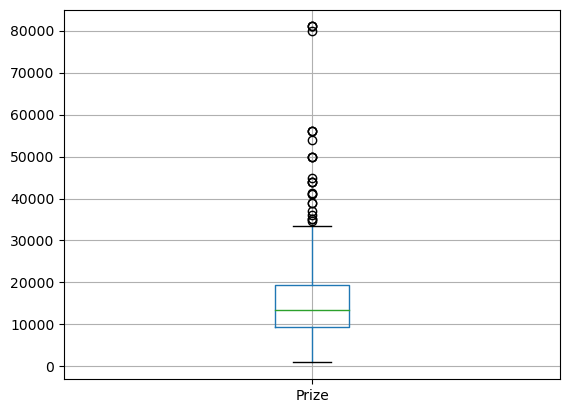

In [35]:
#box plot
Mobile_Price.boxplot(column = 'Prize')
plt.show()

In [36]:
#position of outiers
outliers = detect_outliers_iqr(Mobile_Price['Memory'])
outliers

[29999,
 29999,
 29999,
 29999,
 29999,
 29999,
 29999,
 32999,
 32999,
 32999,
 49999,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256]

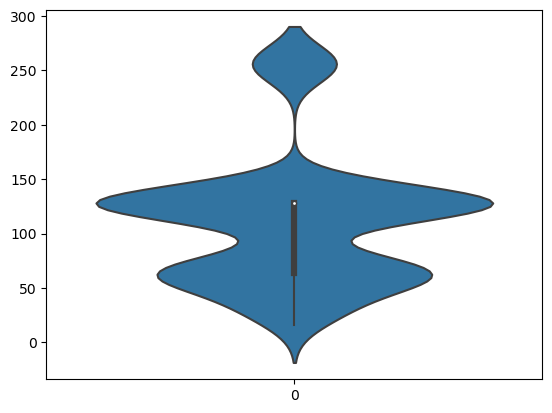

In [37]:
sns.violinplot(Mobile_Price['Memory'])
plt.show()

In [38]:
#position of outiers
outliers = detect_outliers_iqr(Mobile_Price['RAM'])
outliers

[29999,
 29999,
 29999,
 29999,
 29999,
 29999,
 29999,
 32999,
 32999,
 32999,
 49999,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256]

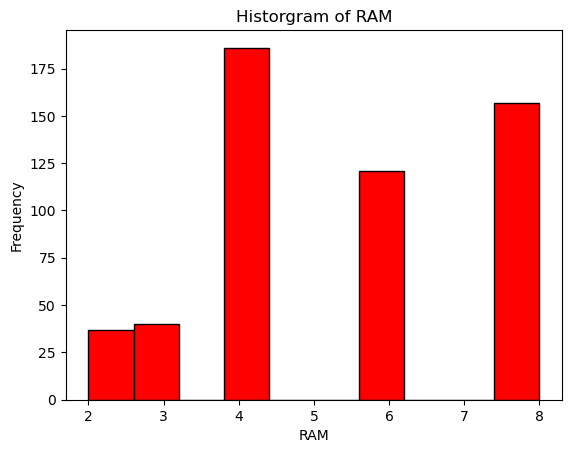

In [39]:
# Histogram
plt.hist(Mobile_Price['RAM'],color='red', edgecolor='black',bins=10)
plt.title('Historgram of RAM')
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis

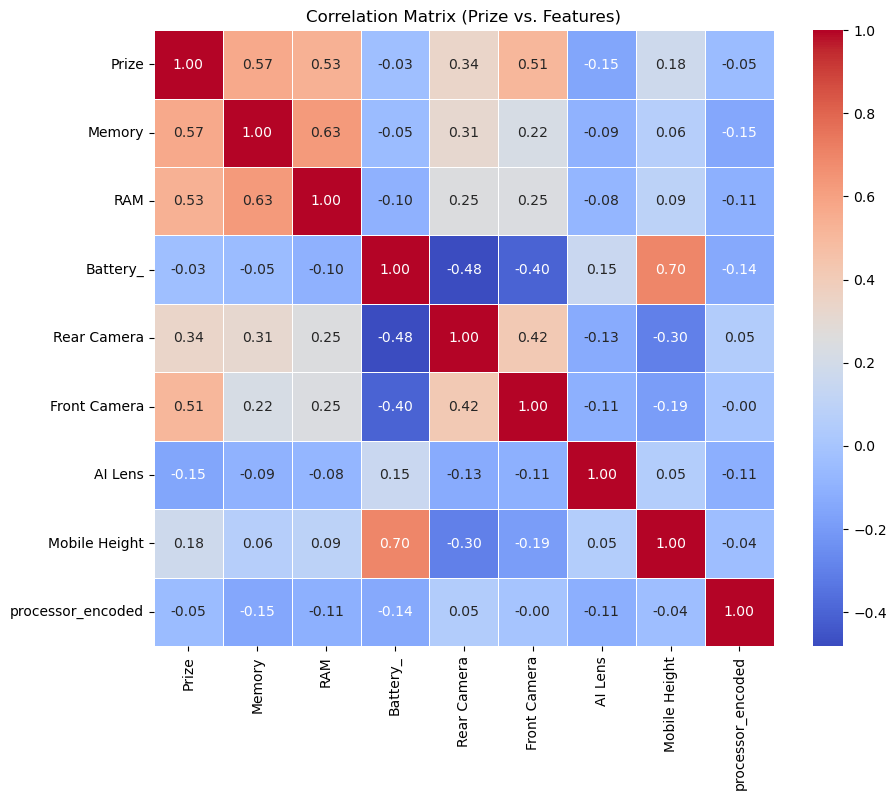

In [40]:
# Compute the correlation matrix
corr_matrix = Mobile_Price[['Prize', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height','processor_encoded']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Prize vs. Features)')
plt.show()

# feature selection algorithms to identify important features.

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

X = Mobile_Price[['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens', 'processor_encoded']]
y = Mobile_Price['Prize']

# Initialize SelectKBest with f_regression scoring function and select top K features
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features (adjust k as needed)

# Fit selector to X and y
X_selected = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Display selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Memory', 'RAM', 'Rear Camera', 'Front Camera', 'AI Lens'], dtype='object')


SelectKBest with f_regression selects the top k features based on their relationship (linear correlation) with the target variable y (prize).

Adjust the value of k to select a different number of top features based on your requirements.

selected_features will contain the names of the features selected by the feature selection algorithm (SelectKBest).

# Split the Dataset into Training and Testing Sets

In [42]:
# Spliting the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (432, 5) (432,)
Testing set shape: (109, 5) (109,)


# Build and Train Regression Models

# Linear Regression

In [43]:
# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

# Decision Tree Regression

In [44]:
# Initialize and train Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

# Random Forest Regression

In [45]:
# Initialize and train Random Forest Regression model
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)


RandomForestRegressor()

# Evaluate Model Performance

Evaluate the performance of each model using appropriate metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on the testing set.

In [46]:
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return mae, rmse

# Evaluate Linear Regression model
linear_reg_mae, linear_reg_rmse = evaluate_model(linear_reg, X_test, y_test)

# Evaluate Decision Tree Regression model
decision_tree_reg_mae, decision_tree_reg_rmse = evaluate_model(decision_tree_reg, X_test, y_test)

# Evaluate Random Forest Regression model
random_forest_reg_mae, random_forest_reg_rmse = evaluate_model(random_forest_reg, X_test, y_test)

# Print evaluation results
print("Linear Regression:")
print("MAE:", linear_reg_mae)
print("RMSE:", linear_reg_rmse)
print()

print("Decision Tree Regression:")
print("MAE:", decision_tree_reg_mae)
print("RMSE:", decision_tree_reg_rmse)
print()

print("Random Forest Regression:")
print("MAE:", random_forest_reg_mae)
print("RMSE:", random_forest_reg_rmse)


Linear Regression:
MAE: 4201.422479072764
RMSE: 7464.4123874522265

Decision Tree Regression:
MAE: 2300.633318465429
RMSE: 4522.591615524864

Random Forest Regression:
MAE: 2932.733757063968
RMSE: 5443.59979558733


# Visualizing Predicted vs. Actual Prices

Certainly! we can visualize the results of the regression algorithms using matplotlib to create various plots such as scatter plots to compare predicted vs. actual prices or bar charts to show feature importances. Below is an example of how we can visualize the results of your regression models using matplotlib in Python.

Visualizing Predicted vs. Actual Prices
we can create scatter plots to compare the predicted prices vs. the actual prices on the test set for each regression model.

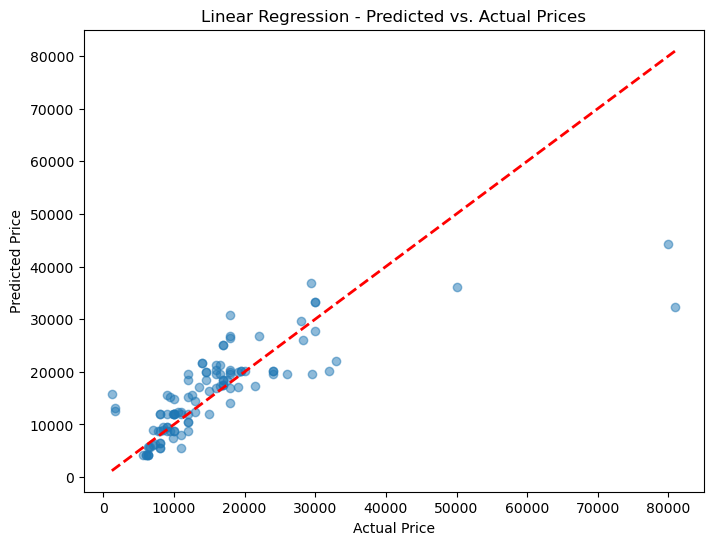

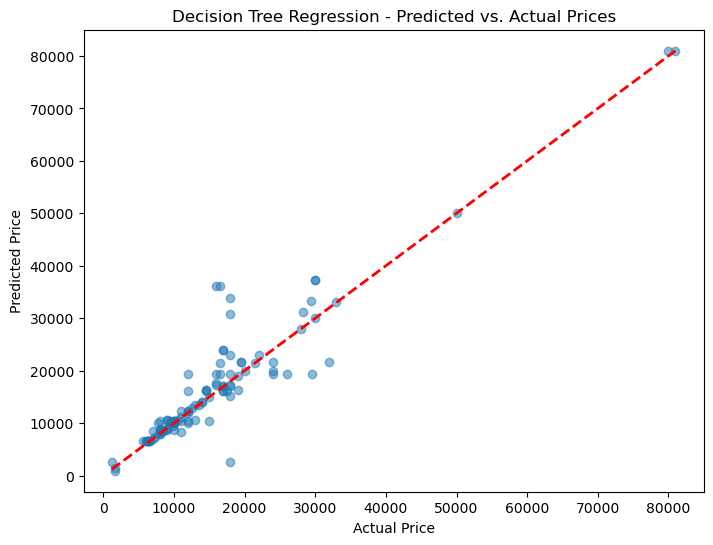

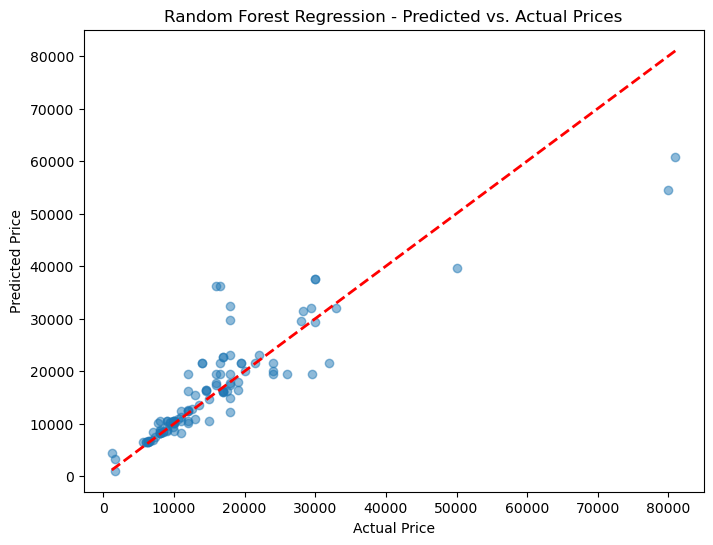

In [47]:
# Function to plot predicted vs. actual prices
def plot_predictions(model, X_test, y_test, model_name):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Plot predicted vs. actual prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Predicted vs. Actual Prices')
    plt.show()

# Plot Linear Regression predictions
plot_predictions(linear_reg, X_test, y_test, 'Linear Regression')

# Plot Decision Tree Regression predictions
plot_predictions(decision_tree_reg, X_test, y_test, 'Decision Tree Regression')

# Plot Random Forest Regression predictions
plot_predictions(random_forest_reg, X_test, y_test, 'Random Forest Regression')


# Visualizing Feature Importances

For tree-based models like Decision Tree Regression and Random Forest Regression, we can plot the feature importances to understand which features have the most impact on price prediction.

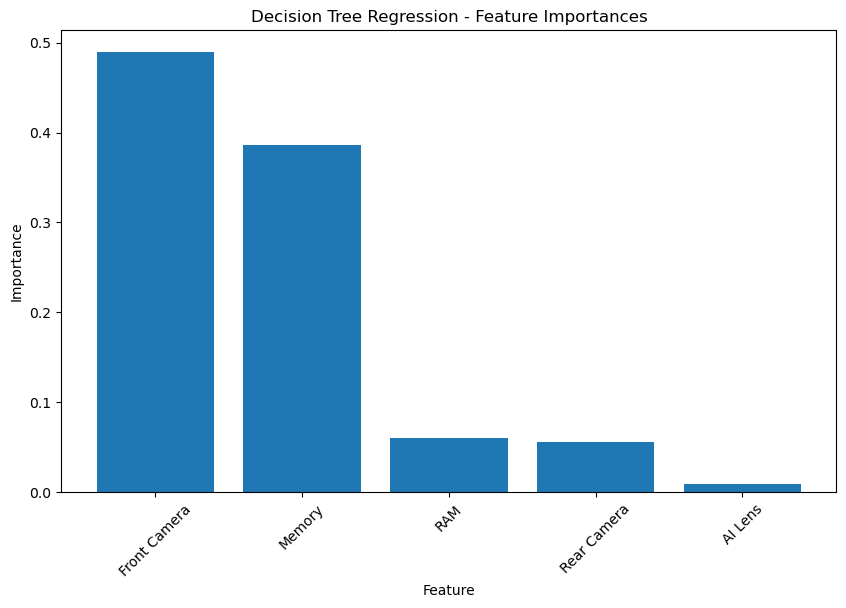

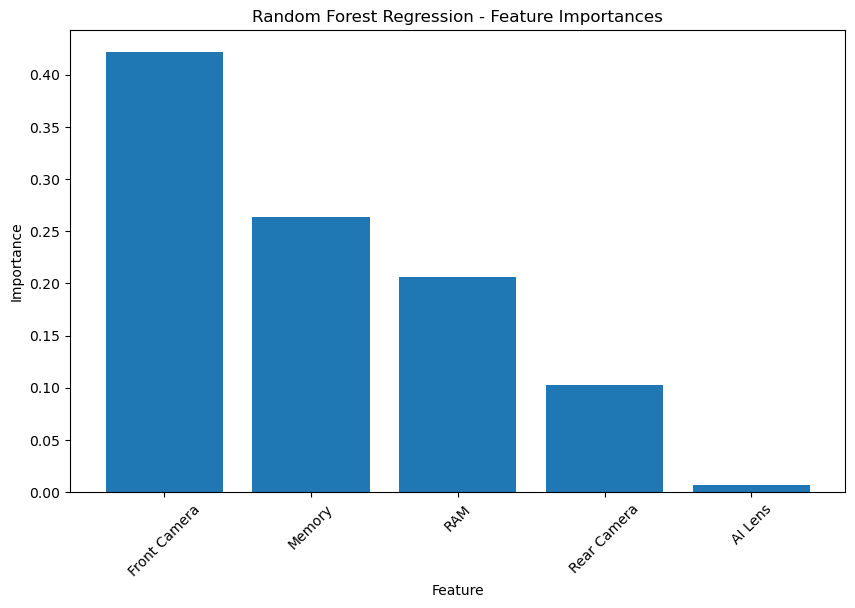

In [48]:
# Function to plot feature importances
def plot_feature_importances(model, feature_names, model_name):
    # Get feature importances from the model
    importances = model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importances[indices], align='center')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'{model_name} - Feature Importances')
    plt.show()

# Plot Decision Tree Regression feature importances
plot_feature_importances(decision_tree_reg, selected_features, 'Decision Tree Regression')

# Plot Random Forest Regression feature importances
plot_feature_importances(random_forest_reg, selected_features, 'Random Forest Regression')
